In [9]:
import joblib
import numpy as np

#load neural network
neuralNetwork2 = joblib.load("neuralNetwork.pkl")


In [32]:
#testData -> iota, axis_Length, max_elongation
asked_iota = 0.3
asked_axis_length = 1.08
asked_max_elongation = 5
#predict
predicted = neuralNetwork2.predict([[asked_iota, asked_axis_length, asked_max_elongation]])
nfp, rc1, zs1, etabar = predicted[0]
nfp = int(np.round(nfp))
print(f"The Result was:\nnfp={nfp}, rc1={rc1}, zs1={zs1}, etabar={etabar}\n")

The Result was:
nfp=2, rc1=0.14110723767641883, zs1=-0.19627176142380542, etabar=-0.8800181981847295



/opt/local/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Predicted iota: 0.59660289177425
Asked iota:     0.3

Predicted axis_length: 6.64326462409409
Asked axis_length:     1.08

Predicted max_elongation: 9.266884875438867
Asked max_elongation:     5


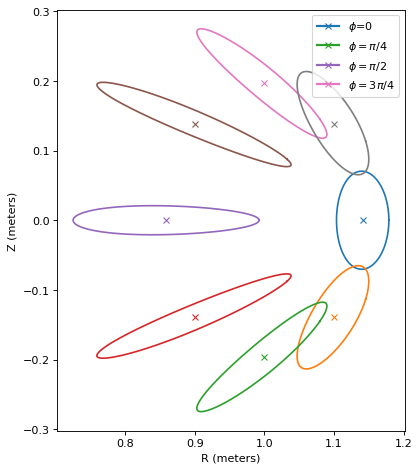

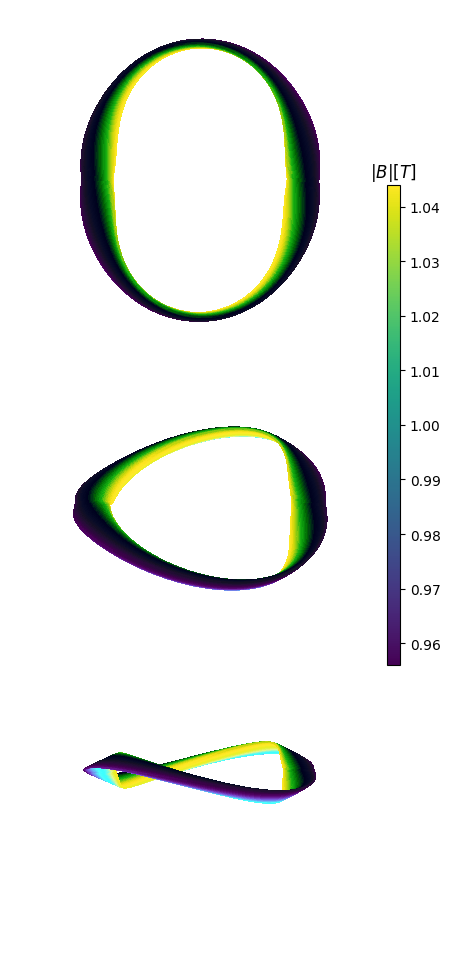

In [40]:
from qsc import Qsc
stel = Qsc(rc=[1,rc1],zs=[0,zs1],nfp=nfp,etabar=etabar)
print('Predicted iota:', stel.iota)
print('Asked iota:    ', asked_iota)
print('')
print('Predicted axis_length:', stel.axis_length)
print('Asked axis_length:    ', asked_axis_length)
print('')
print('Predicted max_elongation:', stel.max_elongation)
print('Asked max_elongation:    ', asked_max_elongation)
stel.plot_boundary(r=0.05)

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv("../CreateDatabase/scan234.csv")
X = df.loc[:, ['RotTrans', 'axLenght', 'max_elong']]
y = df.loc[:, ['nfp', 'rc1', 'zs1', 'eta']]

# Split training and testing sets
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, train_size=0.7,
                     random_state=0)

Text(0, 0.5, 'Actual')

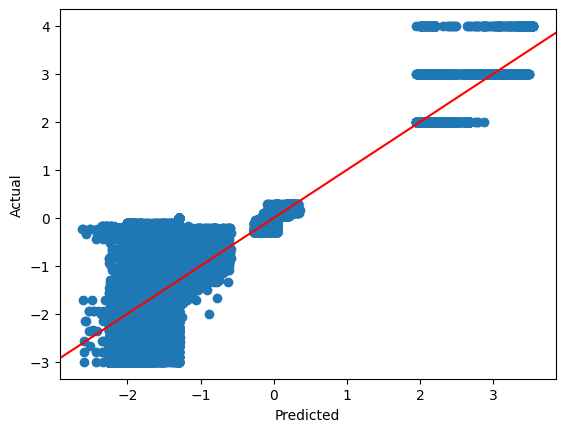

In [43]:
import matplotlib.pyplot as plt
Y_NN = neuralNetwork2.predict(X_test)
plt.scatter(np.ravel(Y_NN),np.ravel(y_test))
plt.axline([0, 0], [1, 1], color='red')
plt.xlabel('Predicted')
plt.ylabel('Actual')

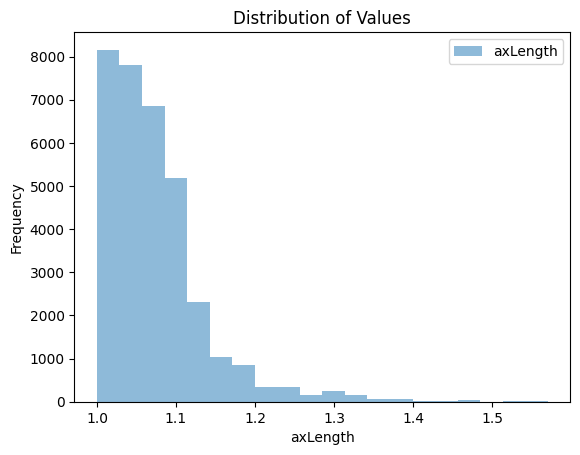

In [48]:
df = pd.read_csv("../CreateDatabase/scan234.csv")
# Create a histogram
plt.hist(df['axLenght'], bins=20, alpha=0.5, label='axLength')
# plt.hist(df['RotTrans'], bins=10, alpha=0.5, label='RotTrans')
# plt.hist(df['max_elong'], bins=10, alpha=0.5, label='max_elong')

# Add labels and title
plt.xlabel('axLength')
plt.ylabel('Frequency')
plt.title('Distribution of Values')

# Add a legend
plt.legend()

# Show the histogram
plt.show()